# IS460 Machine Learning & Applications - K-Median & Gausian Mixture Model Clustering
## <i>Unravelling the Shift in Air Travel Preferences 🛫</i>
<u>Class Group No.:</u> G1<br>
<u>Student Group No.:</u> 5<br>
<u>Team Member Details:</u>
<table align='left'>
    <tr>
        <td><strong>Full Name</strong></td>
        <td><strong>Matriculation No.</strong></td>
    </tr>
    <tr>
        <td>Goh Nina Melda</td>
        <td>01445491</td>
    </tr>
    <tr>
        <td>Laetitia Hong Jae-ee</td>
        <td>01440359</td>
    </tr>
    <tr>
        <td>Leong Chong Gui</td>
        <td>01520030</td>
    </tr>
    <tr>
        <td>Ng Wei Lun Andrew</td>
        <td>01397857</td>
    </tr>
    <tr>
        <td>Sze Xin Wei</td>
        <td>01394966</td>
    </tr>
</table>

#

# Table of Contents
<table align='left'>
    <tr>
        <td><strong>No.</strong></td>
        <td><strong>Section Title</strong></td>
    </tr>
    <tr>
        <td align='center'>1</td>
        <td><a href='#1.-Dataset-Overview'>Dataset Overview</a></td>
    </tr>
    <tr>
        <td align='center'>2</td>
        <td><a href='#2.-K-Median-Clustering'>K-Median Clustering</a></td>
    </tr>
    <tr>
        <td align='center'>3</td>
        <td><a href='#3.-Gausian-Mixture-Model-(GMM)-Clustering'>Gausian Mixture Model (GMM) Clustering</a></td>
    </tr>
</table>

#

# 1. Dataset Overview
The table below summarises the properties of the attributes of our data source (not in chronological order).<br><br>
<i><u>Source:</u> Vyshnia, G. (2023). Kaggle. <a href='https://www.kaggle.com/code/gvyshnya/airline-reviews-sentiments-ts-and-eda/input'>Link to dataset.</a></i>
<hr>

<table align='left' style='word-wrap: break-word'>
    <tr>
        <td><strong>Category</strong></td>
        <td><strong>Name</strong></td>
        <td><strong>Data Type</strong></td>
        <td><strong>Description</strong></td>
    </tr>
    <tr>
        <td rowspan='11'>Qualitative descriptive data</td>
        <td>Serial Number</td>
        <td>Integer</td>
        <td>Indication of row indices.</td>
    </tr>
    <tr>
        <td>Airline Name</td>
        <td>String</td>
        <td>Name of airline being reviewed.</td>
    </tr>
    <tr>
        <td>Review_Title</td>
        <td>String</td>
        <td>Title of user-generated review.</td>
    </tr>
    <tr>
        <td>Review Date</td>
        <td>String</td>
        <td>Date of review submission, with format DD% Month YYYY.</td>
    </tr>
    <tr>
        <td>Verified</td>
        <td>Boolean</td>
        <td>Binary indication of whether the reviewer is verified (represented as 'True'), or not (represented as 'False').</td>
    </tr>
    <tr>
        <td>Review</td>
        <td>String</td>
        <td>Detailed user-generated review of airline experience.</td>
    </tr>
    <tr>
        <td>Aircraft</td>
        <td>String</td>
        <td>Model of aircraft boarded by user.</td>
    </tr>
    <tr>
        <td>Type of Traveller</td>
        <td>String</td>
        <td>Categorical indication of purpose of travel, designated by the following unique values:
            <li>Business</li>
            <li>Couple Leisure</li>
            <li>Family Leisure</li>
            <li>Solo Leisure</li>
        </td>
    </tr>
    <tr>
        <td>Seat Type</td>
        <td>String</td>
        <td>Categorical indication of class of seating, designated by the following unique values:
            <li>First Class</li>
            <li>Business Class</li>
            <li>Premium Economy</li>
            <li>Economy Class</li>
        </td>
    </tr>
    <tr>
        <td>Route</td>
        <td>String</td>
        <td>Specific flight route, with the following format: [Departure Destination] to [Arrival Destination].</td>
    </tr>
    <tr>
        <td>Date Flown</td>
        <td>String</td>
        <td>Month and Year of flight.</td>
    </tr>
    <tr>
        <td rowspan='9'>Quantitative descriptive data</td>
        <td>Overall_Rating</td>
        <td>Integer</td>
        <td>Ordinal rating given by user, with values between the range of 1-10.</td>
    </tr>
    <tr>  
        <td>Seat Comfort</td>
        <td>Float</td>
        <td rowspan='7'>Ordinal rating ranging from 1.0 to 5.0.</td>
    </tr>
    <tr>
        <td>Cabin Staff Service</td>
        <td>Float</td>
    </tr>
    <tr>
        <td>Food & Beverages</td>
        <td>Float</td>
    </tr>
    <tr>
        <td>Ground Service</td>
        <td>Float</td>
    </tr>
    <tr>
        <td>Inflight Entertainment</td>
        <td>Float</td>
    </tr>
    <tr>
        <td>Wifi & Connectivity</td>
        <td>Float</td>
    </tr>
    <tr>
        <td>Value For Money</td>
        <td>Float</td>
    </tr>
    <tr>
        <td>Recommended</td>
        <td>String</td>
        <td>Binary indication of whether the user recommends the airline (represented as 'yes') or not (represented as 'no').</td>
    </tr>
</table>

<hr>
<i>Back to <a href='#Table-of-Contents'>Table of Contents</a></i>

#

# 2. K-Median Clustering
<hr>
<i>Back to <a href='#Table-of-Contents'>Table of Contents</a></i>

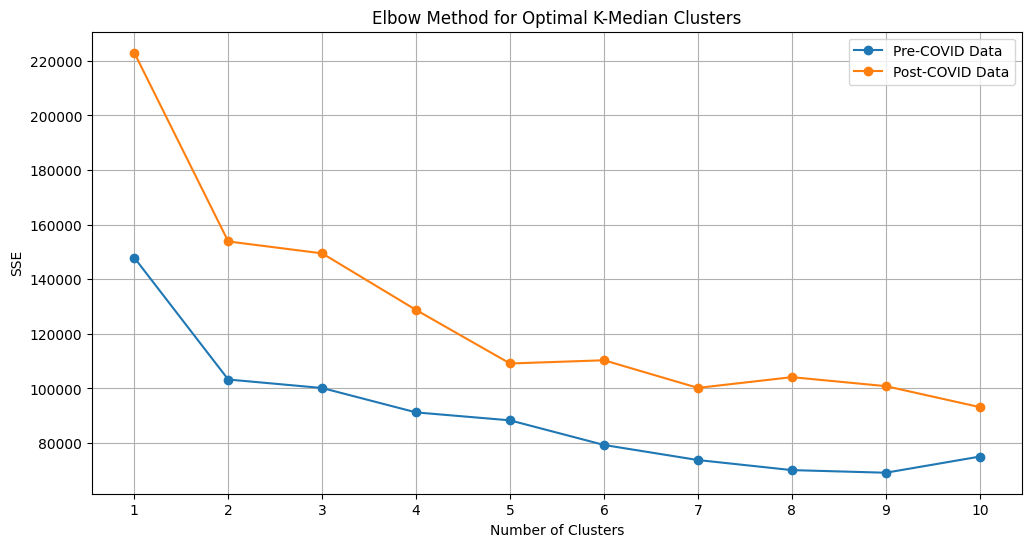

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the datasets
pre_covid_df = pd.read_csv('pre_covid_filled.csv')
post_covid_df = pd.read_csv('post_covid_filled.csv')

# Function to perform K-Median clustering and calculate SSE
def kmedian_sse(df, max_clusters):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)

    sse_values = []

    for n_clusters in range(1, max_clusters + 1):
        # Initialize random cluster centers
        initial_centers = scaled_data[np.random.choice(scaled_data.shape[0], n_clusters, replace=False)]

        for _ in range(100):  # Max iterations
            distances = np.linalg.norm(scaled_data[:, np.newaxis] - initial_centers, axis=2)
            labels = np.argmin(distances, axis=1)

            # Update cluster centers to be the median of the points in each cluster
            new_centers = []
            for k in range(n_clusters):
                if np.any(labels == k):
                    new_centers.append(np.median(scaled_data[labels == k], axis=0))
                else:
                    new_centers.append(initial_centers[k])  # Keep previous center

            new_centers = np.array(new_centers)

            # Check for convergence
            if np.all(new_centers == initial_centers):
                break

            initial_centers = new_centers

        # Calculate SSE
        sse = np.sum(np.min(distances, axis=1) ** 2)
        sse_values.append(sse)

    return sse_values

# Calculate SSE for both datasets
max_clusters = 10  # Adjust as needed

pre_covid_sse = kmedian_sse(pre_covid_df, max_clusters)
post_covid_sse = kmedian_sse(post_covid_df, max_clusters)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(1, max_clusters + 1), pre_covid_sse, marker='o', label='Pre-COVID Data')
plt.plot(range(1, max_clusters + 1), post_covid_sse, marker='o', label='Post-COVID Data')
plt.title('Elbow Method for Optimal K-Median Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.xticks(range(1, max_clusters + 1))
plt.legend()
plt.grid()
plt.show()



In [20]:
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML


# Function to perform K-Median clustering and display results as a styled table
def perform_kmedian_and_display_styled_table(df, title):
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)

    n_clusters = 2  # Adjust the number of clusters as needed

    # Initialize random cluster centers
    initial_centers = scaled_data[np.random.choice(scaled_data.shape[0], n_clusters, replace=False)]

    for _ in range(100):  # Max iterations
        # Assign clusters based on the nearest median
        distances = np.linalg.norm(scaled_data[:, np.newaxis] - initial_centers, axis=2)
        labels = np.argmin(distances, axis=1)

        # Update cluster centers to be the median of the points in each cluster
        new_centers = np.array([np.median(scaled_data[labels == k], axis=0) for k in range(n_clusters)])

        # Check for convergence (if centers do not change)
        if np.all(new_centers == initial_centers):
            break

        initial_centers = new_centers

    # Inverse transform the cluster centers to original scale
    original_centers = scaler.inverse_transform(initial_centers)

    # Create a DataFrame for the cluster centers
    cluster_centers_df = pd.DataFrame(original_centers, columns=df.columns)
    cluster_centers_df.index = [f'Cluster {i + 1}' for i in range(n_clusters)]

    # Transpose the DataFrame to have variables as rows and clusters as columns
    transposed_df = cluster_centers_df.T

    # Create a styled table with color conditioning
    styled_table = transposed_df.style.background_gradient(cmap='coolwarm').set_table_attributes('style="width: 80%; margin: auto;"')

    # Display the title and the styled table
    display(HTML(f"<h3>{title}</h3>"))
    display(styled_table)

# Perform K-Median clustering and display for pre-COVID data
perform_kmedian_and_display_styled_table(pre_covid_df, "Cluster Centers - Pre-COVID")

# Perform K-Median clustering and display for post-COVID data
perform_kmedian_and_display_styled_table(post_covid_df, "Cluster Centers - Post-COVID")




,Cluster 1,Cluster 2
Overall_Rating,1.000000,7.000000
Seat Comfort,1.000000,4.000000
Cabin Staff Service,2.000000,5.000000
Food & Beverages,1.000000,4.000000
Ground Service,1.000000,4.000000
Inflight Entertainment,1.000000,3.000000
Wifi & Connectivity,1.000000,1.000000
Value For Money,1.000000,4.000000
Type Of Traveller_Couple Leisure,0.000000,0.000000
Type Of Traveller_Family Leisure,0.000000,0.000000


,Cluster 1,Cluster 2
Overall_Rating,6.000000,1.000000
Seat Comfort,4.000000,1.000000
Cabin Staff Service,5.000000,1.000000
Food & Beverages,4.000000,1.000000
Ground Service,5.000000,1.000000
Inflight Entertainment,3.000000,1.000000
Wifi & Connectivity,2.000000,1.000000
Value For Money,5.000000,1.000000
Type Of Traveller_Couple Leisure,0.000000,0.000000
Type Of Traveller_Family Leisure,-0.000000,-0.000000


<hr>
<i>Back to <a href='#Table-of-Contents'>Table of Contents</a></i>

#

# 3. Gausian Mixture Model (GMM) Clustering
<hr>
<i>Back to <a href='#Table-of-Contents'>Table of Contents</a></i>

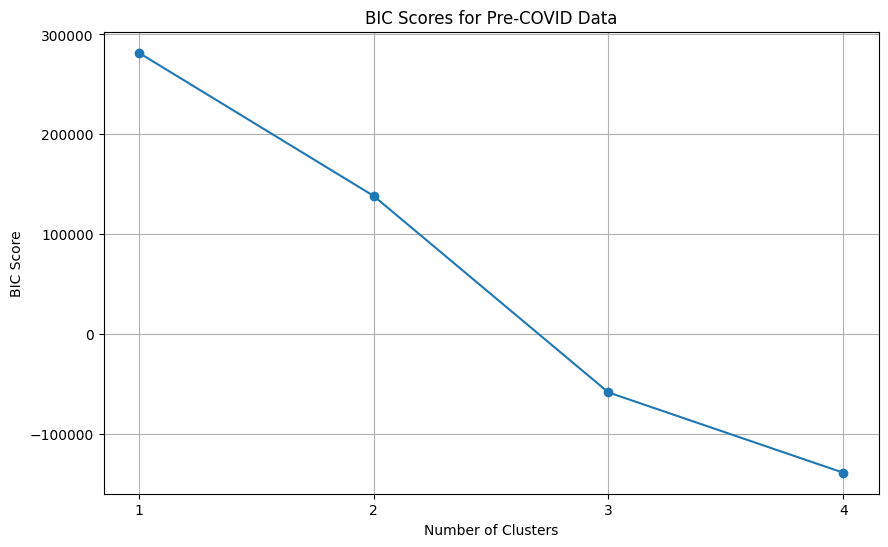

Optimal number of clusters for Pre-COVID Data: 4


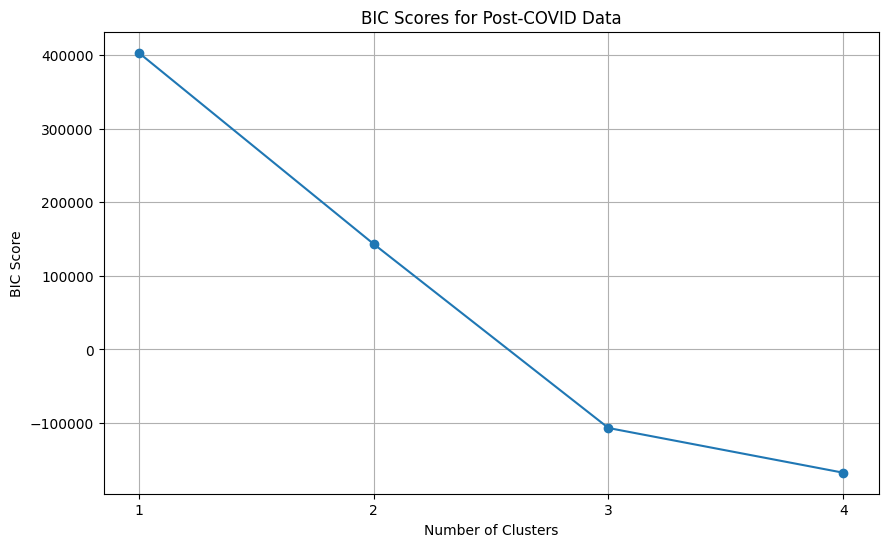

Optimal number of clusters for Post-COVID Data: 4


In [23]:
from sklearn.mixture import GaussianMixture

# Function to perform GMM clustering and select the number of clusters based on BIC
def gmm_clustering_with_bic(df, title):

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)

    # Calculate BIC for different numbers of clusters
    n_components = range(1, 5)  # Test 1 to 10 clusters
    bics = []

    for n in n_components:
        gmm = GaussianMixture(n_components=n, random_state=42)
        gmm.fit(scaled_data)
        bics.append(gmm.bic(scaled_data))

    # Plot BIC scores
    plt.figure(figsize=(10, 6))
    plt.plot(n_components, bics, marker='o')
    plt.title(f'BIC Scores for {title}')
    plt.xlabel('Number of Clusters')
    plt.ylabel('BIC Score')
    plt.xticks(n_components)
    plt.grid()
    plt.show()

    # Determine the optimal number of clusters based on the elbow method
    optimal_clusters = n_components[np.argmin(bics)]
    print(f'Optimal number of clusters for {title}: {optimal_clusters}')

# Perform GMM clustering and BIC analysis for pre-COVID data
gmm_clustering_with_bic(pre_covid_df, "Pre-COVID Data")

# Perform GMM clustering and BIC analysis for post-COVID data
gmm_clustering_with_bic(post_covid_df, "Post-COVID Data")


In [24]:

# Load the datasets
pre_covid_df = pd.read_csv('pre_covid_filled.csv')
post_covid_df = pd.read_csv('post_covid_filled.csv')

# Function to perform GMM clustering and display results as a styled table
def gmm_clustering_and_display_table(df, title):
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)

    # Fit the GMM model
    n_components = 3  # Use the optimal number of clusters based on BIC analysis
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(scaled_data)

    # Get cluster centers
    cluster_centers = gmm.means_

    # Inverse transform the cluster centers to original scale
    original_centers = scaler.inverse_transform(cluster_centers)

    # Create a DataFrame for the cluster centers
    cluster_centers_df = pd.DataFrame(original_centers, columns=df.columns)
    cluster_centers_df.index = [f'Cluster {i + 1}' for i in range(n_components)]

    # Transpose the DataFrame to have variables as rows and clusters as columns
    transposed_df = cluster_centers_df.T

    # Create a styled table with color conditioning
    styled_table = transposed_df.style.background_gradient(cmap='coolwarm').set_table_attributes('style="width: 80%; margin: auto;"')

    # Display the title and the styled table
    display(HTML(f"<h3>{title}</h3>"))
    display(styled_table)

# Perform GMM clustering and display for pre-COVID data
gmm_clustering_and_display_table(pre_covid_df, "Cluster Centers - Pre-COVID")

# Perform GMM clustering and display for post-COVID data
gmm_clustering_and_display_table(post_covid_df, "Cluster Centers - Post-COVID")



,Cluster 1,Cluster 2,Cluster 3
Overall_Rating,1.801150,3.803150,5.951700
Seat Comfort,1.923911,3.181102,3.968541
Cabin Staff Service,2.101526,3.366142,4.390531
Food & Beverages,1.958195,2.980315,3.711471
Ground Service,1.534616,2.964567,4.072450
Inflight Entertainment,1.658980,2.539370,2.654936
Wifi & Connectivity,1.532242,1.960630,2.059662
Value For Money,1.561823,2.980315,4.348268
Type Of Traveller_Couple Leisure,0.296616,0.389764,0.238640
Type Of Traveller_Family Leisure,0.211900,0.114173,0.186209


,Cluster 1,Cluster 2,Cluster 3
Overall_Rating,1.964516,1.507631,5.194846
Seat Comfort,2.153763,1.849198,4.109425
Cabin Staff Service,2.320430,2.043326,4.510413
Food & Beverages,1.891398,1.776384,3.711966
Ground Service,1.704301,1.446715,4.270738
Inflight Entertainment,2.058065,1.662830,2.923050
Wifi & Connectivity,1.744086,1.487584,2.481468
Value For Money,1.508602,1.381014,4.388281
Type Of Traveller_Couple Leisure,0.286022,0.272633,0.247088
Type Of Traveller_Family Leisure,0.151613,0.267460,0.200847


<hr>
<i>Back to <a href='#Table-of-Contents'>Table of Contents</a></i><br><br>
<h4>End of script.</h4>